### Diagrama de interacción de un muro T

In [57]:
import numpy as np
import matplotlib.pyplot as plt

Datos de entrada

In [58]:
B = 2.5
h1 = 0.1
t = 0.1
h2 = 1.95
ht = h1+h2
fc = 28000
fy = 420000
ec = 0.003
ey = 0.002
beta = 0.85
pos_acero = np.linspace(0.05,ht-0.05,14)
a7 = (7/1000)**2*np.pi/4
acero = np.array([16,1,1,1,1, 1,1,1,1,1,1,1,1,1,])*a7

Algunas funciones de ayuda

In [59]:
def elastoplastico(es,Es = 210000000 ,fy = 420000):
    fs = es*Es
    if fs > fy:
        fs = fy
    elif fs < -fy:
        fs = -fy
    return fs

vec_elastoplastico = np.vectorize(elastoplastico) # se convierten a funciones vectorizables


In [60]:
ybarra = (B*h1*h1/2 + t*h2*(h2/2+h1))/(B*h1+t*h2)
npuntos = 500
pos_c = np.linspace(0.01,1.5*ht,npuntos)
P, M = [],[]
for c in pos_c:
    es = ec*(c-pos_acero)/c
    fs = vec_elastoplastico(es)
    Fs = fs*acero
    Ms = Fs*(ybarra - pos_acero)
    bc = beta*c
    if bc < h1:
        Fc = 0.85*fc*bc*B
        ybc = bc/2
        Mc = Fc*(ybarra-ybc)
    else:
        Fc = 0.85*fc*(B*h1 + t*(bc-h1))
        ybc = (B*h1*h1/2 + t*(bc-h1)*((bc-h1)/2 + h1))/(B*h1 + t*(bc-h1))
        Mc = Fc*(ybarra-ybc)
    P.append(Fc+np.sum(Fs))
    M.append(Mc+np.sum(Ms))

P0 = 0.85*fc*(B*h1+t*h2-np.sum(acero))

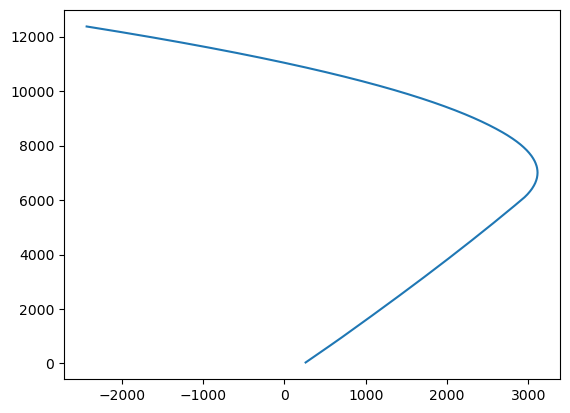

In [61]:
plt.plot(M,P)